Neural network takes data in csv form, as pair rgb, depth per line.

So we prepare data in required format and csv for them.

### converting files from tiff to jpg (RGB) and png (depth) and moving them to new folder

In [3]:
import glob
import os
from configparser import ConfigParser
import progressbar
from joblib import Parallel, delayed
from PIL import Image
import numpy as np
import csv
from visualization import load_depth


In [18]:
def get_base_name(name):
    return os.path.basename(os.path.splitext(name)[0])


def convert_tiff(in_directory, out_directory, out_name, name, out_format, is_depth=False):
    if 'pbar' in globals() and 'counter' in globals():
        global counter
        counter += 1
        pbar.update(counter)

    outfile = os.path.join(out_directory, "{}.{}".format(out_name, out_format))
    if os.path.exists(outfile):
        return

    try:
        infile = os.path.join(in_directory, name)
        print('infile: ', infile)
        print('is_depth: ', is_depth)
        print('outfile: ', outfile)
        if is_depth:
            depth = load_depth(name) * 255.0
            im = Image.fromarray(depth.astype(np.uint8), mode="L")
        else:
            im = Image.open(infile)
            im = im.convert(mode="RGB")
        print("Generating new format for {} to new file {}".format(name, out_name))
        im.save(outfile)
    except OSError:
        # print("Skipping invalid file {}".format(name))
        return


def tiff_to_dataset(in_directory, out_directory, name, rgb_format, depth_format):
    convert_tiff(in_directory, out_directory, get_base_name(name), get_base_name(name)+'.tiff', rgb_format, is_depth=False)
    convert_tiff(in_directory, out_directory, get_base_name(name), get_base_name(name), depth_format, is_depth=True)


def construct_proj_matrix():
    near_clip = 1.5
    l = -1
    r = 1
    t = 1
    b = -1
    return np.array([
        
    ])
    
def ndc_to_real(depth, proj_matrix):
    # converts ndc depth to real depth in meters
    convert_tiff(in_directory, out_directory, get_base_name(name), get_base_name(name)+'.tiff', rgb_format)
    convert_tiff(in_directory, out_directory, get_base_name(name), get_base_name(name)+'-depth.tiff', depth_format)



In [19]:
ini_file = "gta-postprocessing.local.ini"

CONFIG = ConfigParser()
CONFIG.read(ini_file)
in_directory = CONFIG["Images"]["Tiff"]
out_directory = CONFIG["Images"]["MlDataset"]
out_root_directory = 'D:\projekty\GTA-V-extractors\depthEstimationNN1'

rgb_format = 'jpg'
depth_format = 'png'

import visualization
visualization.multi_page = False
visualization.ini_file = ini_file


In [21]:
workers = 1
pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].tiff'

widgets = [progressbar.Percentage(), ' ', progressbar.Counter(), ' ', progressbar.Bar(), ' ',
           progressbar.FileTransferSpeed()]

files = glob.glob(os.path.join(in_directory, pattern))
files = list(files)[0:5]

pbar = progressbar.ProgressBar(widgets=widgets, maxval=len(files) * 2).start()
counter = 0

Parallel(n_jobs=workers, backend='threading')(delayed(tiff_to_dataset)(in_directory, out_directory, name, rgb_format, depth_format)
                         for name in files)


infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-47--891.tiff
is_depth:  False
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-47--891.jpg
Generating new format for 2018-02-16--17-06-47--891.tiff to new file 2018-02-16--17-06-47--891
infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-47--891
is_depth:  True
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-47--891.png
Generating new format for 2018-02-16--17-06-47--891 to new file 2018-02-16--17-06-47--891
infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-50--707.tiff
is_depth:  False
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-50--707.jpg
Generating new format for 2018-02-16--17-06-50--707.tiff to new file 2018-02-16--17-06-50--707


infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-50--707
is_depth:  True
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-50--707.png
Generating new format for 2018-02-16--17-06-50--707 to new file 2018-02-16--17-06-50--707
infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-51--531.tiff
is_depth:  False
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-51--531.jpg
Generating new format for 2018-02-16--17-06-51--531.tiff to new file 2018-02-16--17-06-51--531
infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-51--531
is_depth:  True
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-51--531.png
Generating new format for 2018-02-16--17-06-51--531 to new file 2018-02-16--17-06-51--531
infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-52--376.tiff
is_depth:  False
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02

infile:  D:\projekty\GTA-V-extractors\output\2018-02-16--17-06-53--758
is_depth:  True
outfile:  D:\projekty\GTA-V-extractors\depthEstimationNN1\data-gta\2018-02-16--17-06-53--758.png
Generating new format for 2018-02-16--17-06-53--758 to new file 2018-02-16--17-06-53--758


[None, None, None, None, None]

In [12]:
files = glob.glob(os.path.join(in_directory, pattern))

filenames = []
for i, name in enumerate(files):
    rgb_name = "{}.{}".format(get_base_name(name), rgb_format)
    rgb_name = os.path.relpath(os.path.join(out_directory, rgb_name), start=out_root_directory)
    rgb_name = rgb_name.replace('\\', '/')
    depth_name = "{}.{}".format(get_base_name(name), depth_format)
    depth_name = os.path.relpath(os.path.join(out_directory, depth_name), start=out_root_directory)
    depth_name = depth_name.replace('\\', '/')
    filenames.append([rgb_name, depth_name]) 

    # r je abych nemusel psát zpětná lomítka
with open(os.path.join(out_root_directory, 'train-gta.csv'), 'w+', newline='') as f:
    csv.writer(f).writerows(filenames)


<IPython.core.display.Javascript object>


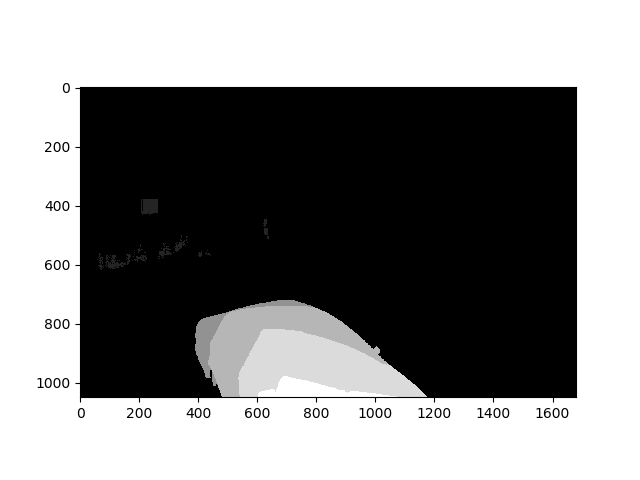

In [24]:
import matplotlib.pyplot as plt
depth = load_depth('2018-02-16--17-06-50--707') * 255.0
%matplotlib notebook
im = Image.fromarray(depth.astype(np.uint8), mode="L")
plt.figure()
plt.imshow(depth.astype(np.uint8), cmap='gray')
plt.show()